In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
def cost(X, Y, m):
    costJ = 0
    N = len(X)
    for i in range(N):
        costJ += (1/N) * ((Y[i] - np.dot(m, X[i]))**2)
    return costJ

def predict(m, X, FeatureScaleStd, FeatureScaleMean):
    X = (X - FeatureScaleMean)/ FeatureScaleStd
    X = np.append(X, 1)
    pred = np.dot(m, X)
    return pred

def batch_gradient_descent(X, Y, learning_rate, n_iterations, batch_size):
    NFeatures = len(X[0])
    X = pd.DataFrame(X)
    X[NFeatures] = 1 #Added a bias feature
    X = np.array(X)
    NFeatures += 1 #increment number of features  
    m = np.zeros(NFeatures)
    NRows = len(X)
    costJ = np.zeros(shape=(n_iterations))
    for j in range(n_iterations):
        
        m_slope = np.zeros(NFeatures)
        for k in range(NFeatures):
                for i in range(NRows):
                    m_slope[k] += (-2/NRows) * (Y[i] - np.dot(m, X[i,:])) * X[i, k]
                    if(i%batch_size == 0):
                        m -= learning_rate * m_slope
        J = cost(X, Y, m)
        costJ[j] = J
        
        
    return m, costJ

In [18]:
def FeatureScaling(X):
    Xmean = X.mean()
    Xstd = np.std(X)
    X = (X - Xmean) / Xstd
    return X, Xmean, Xstd

In [39]:
data = np.genfromtxt("./data/train.csv", delimiter=",")
np.random.shuffle(data)
N = len(data)

train_data = data[0:int(0.8*N),:]
test_data = data[int(0.8*N):N,:]

N = len(train_data[0])
Y_train = train_data[:, N-1]
X_train = train_data[:, 0:N-1]

N = len(test_data[0])
Y_test = test_data[:, N-1]
X_test = test_data[:, 0:N-1]

X, FeatureScaleMean, FeatureScaleStd = FeatureScaling(X_train)
n_iterations = 200
learning_rate = .001
m, cost_history = batch_gradient_descent(X, Y_train, learning_rate, n_iterations, batch_size=10)

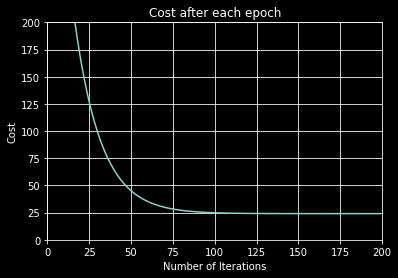

Error = 24.078286477668303


In [41]:
# Plot variation of Cost with each iteration
plt.plot(range(len(cost_history)), cost_history)
plt.style.use("dark_background")
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost after each epoch")
plt.axis([0, len(cost_history), 0, 200])
plt.show()
print("Error =", cost_history[-1])

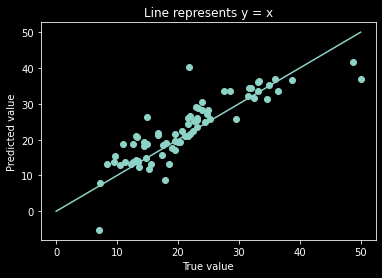

In [42]:
pred = [predict(m, x, FeatureScaleStd, FeatureScaleMean) for x in X_test]
plt.scatter(Y_test, pred)
plt.style.use("dark_background")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("Line represents y = x")
plt.plot([0, 50], [0,50])
plt.show()

In [43]:
eval_data = np.genfromtxt("./data/test.csv", delimiter=",")
pred = [predict(m, x, FeatureScaleStd, FeatureScaleMean) for x in eval_data]
np.savetxt('./Output/predictions.csv', pred, delimiter=',')